In [1]:
import tensorflow as tf 


In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

(-0.5, 27.5, 27.5, -0.5)

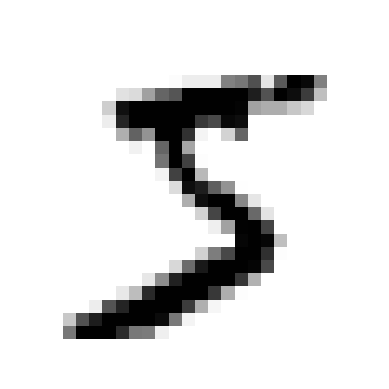

In [9]:
img= X_train_full[0]

plt.imshow(img, cmap = "binary")
plt.axis("off")

<Axes: >

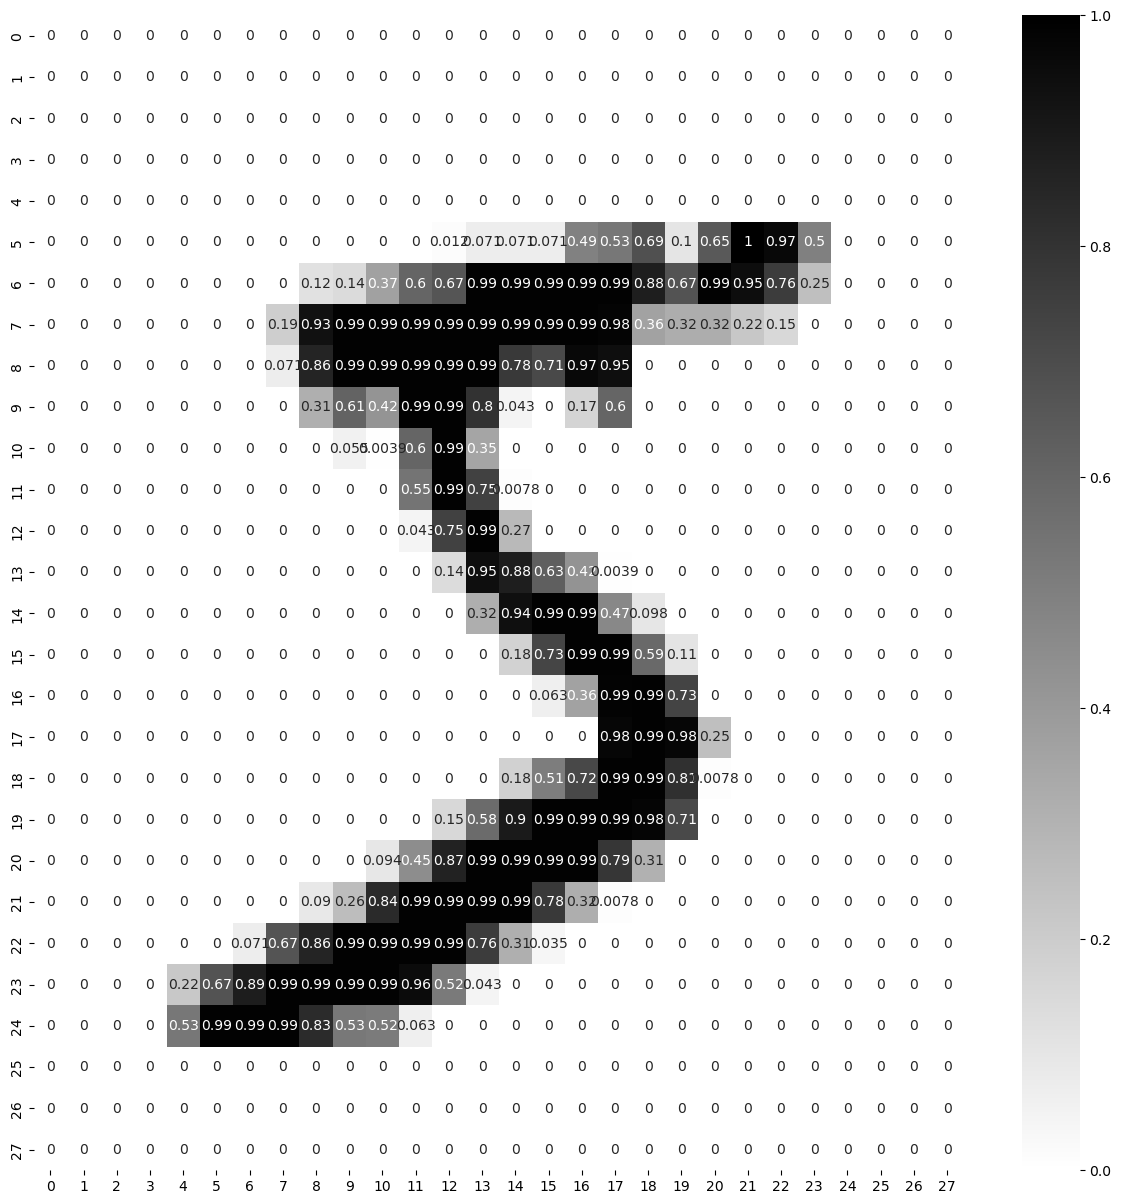

In [10]:
plt.figure(figsize =(15,15))
sns.heatmap(img/255, annot = True, cmap ="binary")

In [11]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
X_test = X_test/255

This is how the model looks like. 784 (28x28) input layers representing all the pixels of each image, 300 and 100 neurons in hidden layers and 10 neurons in the output layer representing 0-9 which is the output of the mnist dataset. The softmax activation at the end gives a probability distribution.

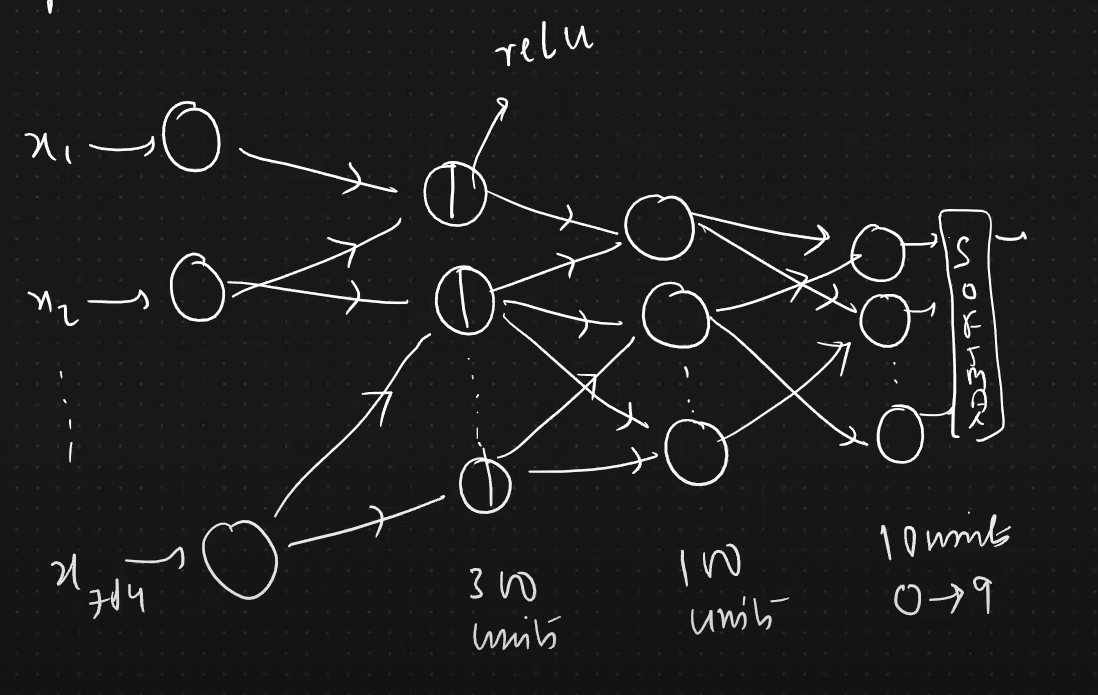

Working of softmax layer is as follows:

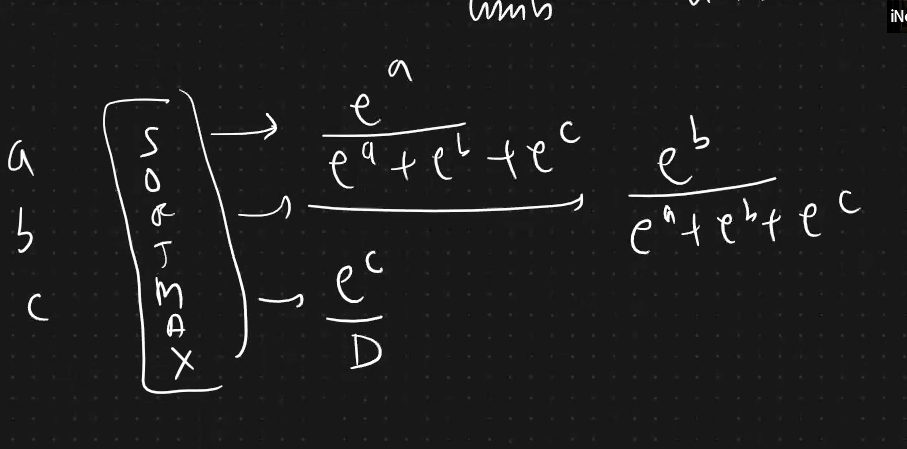

In [13]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape =[28,28], name = "inputLayer"), #flatten converts 28*28 to 784 neurons
    tf.keras.layers.Dense(300, activation = "relu", name = "hiddenlayer1"),
    tf.keras.layers.Dense(100, activation  = "relu", name = "hiddenlayer2"),
    tf.keras.layers.Dense(10, activation = "softmax", name = "outputLayer")
]

In [14]:
#Model Definition
model_clf = tf.keras.models.Sequential(LAYERS) #Sequential because data goes through every layer and there is no skip of layers

In [15]:
 model_clf.layers

In [16]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In the above output, 235500 parameters because 784 inputs fed to 300 neurons in the hidden layer1. The total number of weights and biases in this case is 784*300 + 300 = 235500. 
Similarly, from hiddenlayer1 to hiddenlayer2, number of weights = 300*100 +100(bias) = 30100 and so on. On adding all the parameters, we get 266610 total parameters.
Non-trainable parameters comes into play during transfer learning, where weights are used from a previously trained model thereby reducing the number of total parameters during training, helps in faster training and reduces gpu utlization as well

In [17]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss = LOSS_FUNCTION, optimizer = OPTIMIZER, metrics = METRICS)



In [18]:
EPOCHS = 30
VALIDATION = [X_valid, y_valid]

history = model_clf.fit(X_train, y_train, epochs = EPOCHS, validation_data = VALIDATION)


Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6186 - accuracy: 0.8421 - val_loss: 0.3067 - val_accuracy: 0.9168
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2879 - accuracy: 0.9185 - val_loss: 0.2401 - val_accuracy: 0.9368
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2343 - accuracy: 0.9333 - val_loss: 0.2006 - val_accuracy: 0.9450
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1997 - accuracy: 0.9431 - val_loss: 0.1796 - val_accuracy: 0.9510
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1742 - accuracy: 0.9510 - val_loss: 0.1585 - val_accuracy: 0.9564
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1541 - accuracy: 0.9565 - val_loss: 0.1411 - val_accuracy: 0.9620
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1376 - accuracy: 0.9604 - val_loss: 0.1289 - val_accuracy:

Why 1719 in each epoch?
By default batch_size = 32.
Therefore, 55000 (training datapoints excluding the validation)/32 = 1719.
Also, since we are training the data in batches, we use val_loss and val_accuracy at each epoch to see if the overall training is headed in the right direction. The updated weights at each step is tested on the validation set to see how the model is performing on unseen data

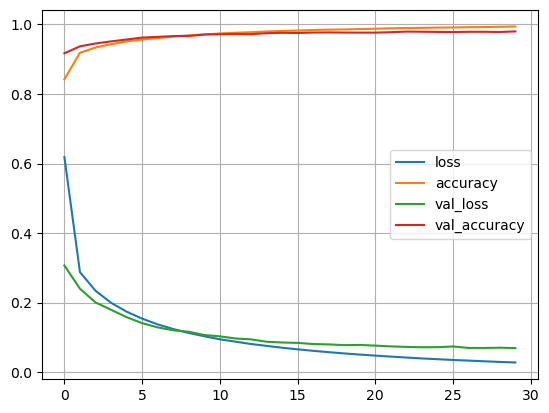

In [19]:
#Visualization of how our model performed
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

In [20]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0707 - accuracy: 0.9785


[0.07067162543535233, 0.9785000085830688]

313 here because 10000 (test datapoints) / 32 (default batch_size) = 313

In [21]:
X_new = X_test[:3]
y_prob = model_clf.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 171ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [23]:
y_pred = np.argmax(y_prob, axis= -1)

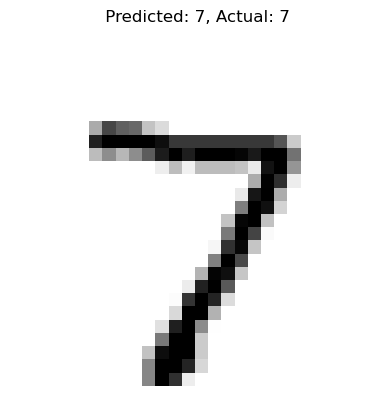

------------------------------------------------------------


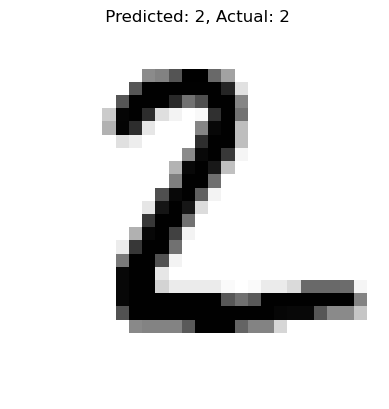

------------------------------------------------------------


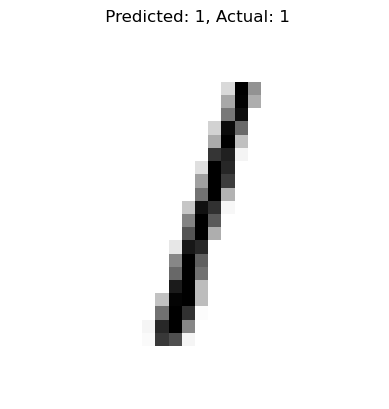

------------------------------------------------------------


In [24]:
for img_array, pred, actual in zip(X_new, y_pred, y_test[:3]):
    plt.imshow(img_array, cmap = "binary")
    plt.title(f" Predicted: {pred}, Actual: {actual}")
    plt.axis("off")
    plt.show()
    print('---'*20)